# INTRODUCTION  

This case study is to find the customers  who had applied for loans and by analysing the data we can find whether the customers 
are eligible for loan or not.We can apply certian EDA techniques in the given data and summarize it.
 

# DATA  AVAILABLE

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.
2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

##### IMPORTING ALL THE LIBRARIES NEED TO DO EDA 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing warnings 

import warnings
warnings.filterwarnings("ignore")


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## DATASET- 1 (application_data.csv)

### 1. Reading and understanding the data

#### 1.1 Loading the  dataset

In [6]:
#importing the application_data.csv file

df1 = pd.read_csv("application_data.csv")

# top 5 values

df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
#importing the previous_application.csv file

df2 = pd.read_csv("previous_application.csv")

# top 5 values

df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.2 Understanding the  dataset

In [8]:
#checking of rows and coloumns of df1 

df1.shape

(307511, 122)

In [9]:
#checking of rows and coloumns of df2 

df2.shape

(1670214, 37)

In [16]:
#checking info of df1

df1.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [17]:
#checking info of df2

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [18]:
#Checking the numerical columns of df1
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [20]:
#Checking the numerical columns of df2
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Insights


1. There are 307511 rows and  122 coloumns in df1(application data)
2. In the dataset, columns have unexpected/missing/NaN values so fixing is required.
3. There are some columns related to DAYS having negative values, So standardising them is required
4. There are columns like DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH and DAYS_EMPLOYED having negative values.
5. Nearly 49 columns have more than 40% missing values and these columns are related to area.So dropping is required


## 2. Data Cleaning 

### 2.1 Null values

In [21]:
# checking how many null values present in each of the columns of df1

df1.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [22]:
# Percentage of null values in each column for df1
perc_null_df1 = round((df1.isnull().sum()/len(df1)*100).sort_values(ascending=True),5)

perc_null_df1

SK_ID_CURR                       0.00000
HOUR_APPR_PROCESS_START          0.00000
REG_REGION_NOT_WORK_REGION       0.00000
LIVE_REGION_NOT_WORK_REGION      0.00000
REG_CITY_NOT_LIVE_CITY           0.00000
REG_CITY_NOT_WORK_CITY           0.00000
LIVE_CITY_NOT_WORK_CITY          0.00000
ORGANIZATION_TYPE                0.00000
FLAG_DOCUMENT_21                 0.00000
FLAG_DOCUMENT_20                 0.00000
FLAG_DOCUMENT_19                 0.00000
FLAG_DOCUMENT_18                 0.00000
FLAG_DOCUMENT_17                 0.00000
FLAG_DOCUMENT_16                 0.00000
FLAG_DOCUMENT_15                 0.00000
FLAG_DOCUMENT_14                 0.00000
FLAG_DOCUMENT_13                 0.00000
FLAG_DOCUMENT_12                 0.00000
FLAG_DOCUMENT_11                 0.00000
FLAG_DOCUMENT_10                 0.00000
FLAG_DOCUMENT_9                  0.00000
FLAG_DOCUMENT_8                  0.00000
FLAG_DOCUMENT_7                  0.00000
FLAG_DOCUMENT_6                  0.00000
FLAG_DOCUMENT_5 

In [23]:
# checking how many null values present in each of the columns of df2

df2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [27]:
# Percentage of null values in each column for df2
perc_null_df2 = round(df1.isnull().sum()/len(df1)*100,4)
perc_null_df2.sort_values(ascending=True,inplace=True)
perc_null_df2

SK_ID_CURR                       0.0000
HOUR_APPR_PROCESS_START          0.0000
REG_REGION_NOT_WORK_REGION       0.0000
LIVE_REGION_NOT_WORK_REGION      0.0000
REG_CITY_NOT_LIVE_CITY           0.0000
REG_CITY_NOT_WORK_CITY           0.0000
LIVE_CITY_NOT_WORK_CITY          0.0000
ORGANIZATION_TYPE                0.0000
FLAG_DOCUMENT_21                 0.0000
FLAG_DOCUMENT_20                 0.0000
FLAG_DOCUMENT_19                 0.0000
FLAG_DOCUMENT_18                 0.0000
FLAG_DOCUMENT_17                 0.0000
FLAG_DOCUMENT_16                 0.0000
FLAG_DOCUMENT_15                 0.0000
FLAG_DOCUMENT_14                 0.0000
FLAG_DOCUMENT_13                 0.0000
FLAG_DOCUMENT_12                 0.0000
FLAG_DOCUMENT_11                 0.0000
FLAG_DOCUMENT_10                 0.0000
FLAG_DOCUMENT_9                  0.0000
FLAG_DOCUMENT_8                  0.0000
FLAG_DOCUMENT_7                  0.0000
FLAG_DOCUMENT_6                  0.0000
FLAG_DOCUMENT_5                  0.0000


### 2.2 Dealing with columns having Null values greater than 40% in df1

In [28]:
# find out the columns having null values more than 40 % in df1 dataframe

null_df1_40 = perc_null_df1[perc_null_df1>40]
null_df1_40

EMERGENCYSTATE_MODE             47.39830
TOTALAREA_MODE                  48.26852
YEARS_BEGINEXPLUATATION_MODE    48.78102
YEARS_BEGINEXPLUATATION_AVG     48.78102
YEARS_BEGINEXPLUATATION_MEDI    48.78102
FLOORSMAX_AVG                   49.76082
FLOORSMAX_MEDI                  49.76082
FLOORSMAX_MODE                  49.76082
HOUSETYPE_MODE                  50.17609
LIVINGAREA_AVG                  50.19333
LIVINGAREA_MODE                 50.19333
LIVINGAREA_MEDI                 50.19333
ENTRANCES_AVG                   50.34877
ENTRANCES_MODE                  50.34877
ENTRANCES_MEDI                  50.34877
APARTMENTS_MEDI                 50.74973
APARTMENTS_AVG                  50.74973
APARTMENTS_MODE                 50.74973
WALLSMATERIAL_MODE              50.84078
ELEVATORS_MEDI                  53.29598
ELEVATORS_AVG                   53.29598
ELEVATORS_MODE                  53.29598
NONLIVINGAREA_MODE              55.17916
NONLIVINGAREA_AVG               55.17916
NONLIVINGAREA_ME

In [29]:
#Count and print no. of columns which contains null values more than 40%

print("No. of columns dropped :",len(null_df1_40))

No. of columns dropped : 49


### INSIGHTS

#### There are 49 columns having null values more than 40% which is related to different areas of home of an applicant which is not related to loan application.Hence better to drop it

In [30]:
null_df1_40.index             

Index(['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'HOUSETYPE_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'ENTRANCES_AVG',
       'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'WALLSMATERIAL_MODE', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1',
       'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI',
       'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE', 'OWN_CAR_AGE',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI',
       'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'NONL

In [31]:
#Remove all the columns using drop function having more than 40% missing values

df1.drop(columns = null_df1_40.index, inplace = True)

In [32]:
# Print the rows and columns of df1 after dropping above columns(null_df1_40)  
print("Updated dataframe df1 rows,columns : ",df1.shape)

Updated dataframe df1 rows,columns :  (307511, 73)


In [33]:
# Percentage of null values in each column for df1 after removing certain columns for checking
perc_null_df1 = round((df1.isnull().sum()/len(df1)*100).sort_values(ascending=True),5)

perc_null_df1

SK_ID_CURR                      0.00000
HOUR_APPR_PROCESS_START         0.00000
REG_REGION_NOT_LIVE_REGION      0.00000
REG_REGION_NOT_WORK_REGION      0.00000
LIVE_REGION_NOT_WORK_REGION     0.00000
REG_CITY_NOT_WORK_CITY          0.00000
LIVE_CITY_NOT_WORK_CITY         0.00000
ORGANIZATION_TYPE               0.00000
FLAG_DOCUMENT_2                 0.00000
FLAG_DOCUMENT_3                 0.00000
FLAG_DOCUMENT_4                 0.00000
FLAG_DOCUMENT_5                 0.00000
FLAG_DOCUMENT_6                 0.00000
FLAG_DOCUMENT_7                 0.00000
FLAG_DOCUMENT_8                 0.00000
FLAG_DOCUMENT_9                 0.00000
FLAG_DOCUMENT_10                0.00000
FLAG_DOCUMENT_11                0.00000
FLAG_DOCUMENT_12                0.00000
FLAG_DOCUMENT_13                0.00000
FLAG_DOCUMENT_14                0.00000
FLAG_DOCUMENT_15                0.00000
FLAG_DOCUMENT_16                0.00000
FLAG_DOCUMENT_17                0.00000
FLAG_DOCUMENT_18                0.00000


### 2.3 Dealing with null values for columns OCCUPATION_TYPE and EXT_SOURCE_3

In [34]:
#deal with null values more than 15%

null_df1_15 = perc_null_df1[perc_null_df1>15]
null_df1_15

EXT_SOURCE_3       19.82531
OCCUPATION_TYPE    31.34555
dtype: float64

In [35]:
# Checking values of OCCUPATION_TYPE column

df1.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### 2.3.1 Imputation of missing values

In [36]:
# Handling missing values for categorical variable OCCUPATION_TYPE
# Check the most common values in the OCCUPATION_TYPE column

df1.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [37]:
# Filling the values with most common values

df1["OCCUPATION_TYPE"]=df1["OCCUPATION_TYPE"].fillna(df1.OCCUPATION_TYPE.mode()[0])

df1["OCCUPATION_TYPE"].value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [38]:
df1["OCCUPATION_TYPE"].isnull().sum()

0

In [39]:
# Drop the column "EXT_SOURCE_3"

df1.drop(columns=['EXT_SOURCE_3'], inplace = True)

 ### 2.4 Impute missing values for the column 'AMT_REQ_CREDIT_BUREAU_YEAR' 

In [40]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
21.0        1
22.0        1
20.0        1
23.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [41]:
## Check the most common values in the AMT_REQ_CREDIT_BUREAU_YEAR/QRT/MON/WEEK/DAY/HOUR column

print("AMT_REQ_CREDIT_BUREAU_YEAR ",df1.AMT_REQ_CREDIT_BUREAU_YEAR.mode())
print("AMT_REQ_CREDIT_BUREAU_QRT ",df1.AMT_REQ_CREDIT_BUREAU_QRT.mode())
print("AMT_REQ_CREDIT_BUREAU_MON ",df1.AMT_REQ_CREDIT_BUREAU_MON.mode())
print("AMT_REQ_CREDIT_BUREAU_WEEK ",df1.AMT_REQ_CREDIT_BUREAU_WEEK.mode())
print("AMT_REQ_CREDIT_BUREAU_DAY ",df1.AMT_REQ_CREDIT_BUREAU_DAY.mode())
print("AMT_REQ_CREDIT_BUREAU_HOUR ",df1.AMT_REQ_CREDIT_BUREAU_HOUR.mode())

AMT_REQ_CREDIT_BUREAU_YEAR  0    0.0
dtype: float64
AMT_REQ_CREDIT_BUREAU_QRT  0    0.0
dtype: float64
AMT_REQ_CREDIT_BUREAU_MON  0    0.0
dtype: float64
AMT_REQ_CREDIT_BUREAU_WEEK  0    0.0
dtype: float64
AMT_REQ_CREDIT_BUREAU_DAY  0    0.0
dtype: float64
AMT_REQ_CREDIT_BUREAU_HOUR  0    0.0
dtype: float64


In [42]:
# Filling AMT_REQ_CREDIT_BUREAU_YEAR/QRT/MON/WEEK/DAY/HOUR  columns with the most frquent value

df1["AMT_REQ_CREDIT_BUREAU_YEAR"]=df1["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(df1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0])
df1["AMT_REQ_CREDIT_BUREAU_QRT"]=df1["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(df1.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0])
df1["AMT_REQ_CREDIT_BUREAU_MON"]=df1["AMT_REQ_CREDIT_BUREAU_MON"].fillna(df1.AMT_REQ_CREDIT_BUREAU_MON.mode()[0])
df1["AMT_REQ_CREDIT_BUREAU_WEEK"]=df1["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(df1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0])
df1["AMT_REQ_CREDIT_BUREAU_DAY"]=df1["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(df1.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0])
df1["AMT_REQ_CREDIT_BUREAU_HOUR"]=df1["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(df1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0])



In [43]:
# Cross check the above columns
print("Null values in AMT_REQ_CREDIT_BUREAU_YEAR=", df1["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum())
print("Null values in AMT_REQ_CREDIT_BUREAU_QRT=",df1["AMT_REQ_CREDIT_BUREAU_QRT"].isnull().sum())
print("Null values in AMT_REQ_CREDIT_BUREAU_MON=",df1["AMT_REQ_CREDIT_BUREAU_MON"].isnull().sum())
print("Null values in AMT_REQ_CREDIT_BUREAU_WEEK=",df1["AMT_REQ_CREDIT_BUREAU_WEEK"].isnull().sum())
print("Null values in AMT_REQ_CREDIT_BUREAU_DAY=",df1["AMT_REQ_CREDIT_BUREAU_DAY"].isnull().sum())
print("Null values in AMT_REQ_CREDIT_BUREAU_HOUR=",df1["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum())

Null values in AMT_REQ_CREDIT_BUREAU_YEAR= 0
Null values in AMT_REQ_CREDIT_BUREAU_QRT= 0
Null values in AMT_REQ_CREDIT_BUREAU_MON= 0
Null values in AMT_REQ_CREDIT_BUREAU_WEEK= 0
Null values in AMT_REQ_CREDIT_BUREAU_DAY= 0
Null values in AMT_REQ_CREDIT_BUREAU_HOUR= 0


In [44]:
#Check the null values percentage in columns
perc_null_df1= df1.isnull().sum()/len(df1)*100
perc_null_df1.sort_values(ascending=False,inplace=True)
perc_null_df1

NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_6                0.000000
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_20               0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000


### 2.5 If we observe the null value percentage of above columns then we find the important columns like "AMT_ANNUITY" and "AMT_GOODS_PRICE" and "NAME_TYPE_SUITE" have some missing values.

In [45]:
#Null values in AMT_ANNUITY COLUMN

df1.AMT_ANNUITY.isnull().sum()

12

In [46]:
#value count of AMT_ANNUITY column

df1.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
4635.0        1
65209.5       1
70920.0       1
85792.5       1
51331.5       1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [47]:
df1["AMT_ANNUITY"]=df1["AMT_ANNUITY"].fillna(df1["AMT_ANNUITY"].median())

df1["AMT_ANNUITY"].isnull().sum()

0

In [48]:
#Null values in AMT_GOODS_PRICE COLUMN

df1.AMT_GOODS_PRICE.isnull().sum()

278

In [49]:
#value count of AMT_GOODS_PRICE column

df1.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [50]:
df1["AMT_GOODS_PRICE"]=df1["AMT_GOODS_PRICE"].fillna(df1["AMT_GOODS_PRICE"].median())

df1["AMT_GOODS_PRICE"].isnull().sum()

0

In [51]:
#Null values in NAME_TYPE_SUITE COLUMN

df1.NAME_TYPE_SUITE.isnull().sum()

1292

In [52]:
#value count of NAME_TYPE_SUITE column

df1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [53]:
df1["NAME_TYPE_SUITE"]=df1["NAME_TYPE_SUITE"].fillna(df1["NAME_TYPE_SUITE"].mode()[0])

df1["NAME_TYPE_SUITE"].isnull().sum()

0

In [54]:
perc_null_df1= df1.isnull().sum()/len(df1)*100
perc_null_df1.sort_values(ascending=False,inplace=True)
perc_null_df1

OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_5                0.000000
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_2                0.000000
REG_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE              0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_20               0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
AMT_REQ_CREDIT_BUREAU_DAY      0.000000


In [55]:
#Checking again which all columns  have Null values

df1.columns[df1.isnull().any()].tolist()

['CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [56]:
df1["OBS_30_CNT_SOCIAL_CIRCLE"]=df1["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(df1["OBS_30_CNT_SOCIAL_CIRCLE"].median())
df1["DEF_30_CNT_SOCIAL_CIRCLE"]=df1["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(df1["DEF_60_CNT_SOCIAL_CIRCLE"].median())
df1["OBS_60_CNT_SOCIAL_CIRCLE"]=df1["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(df1["OBS_30_CNT_SOCIAL_CIRCLE"].median())
df1["DEF_60_CNT_SOCIAL_CIRCLE"]=df1["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(df1["DEF_60_CNT_SOCIAL_CIRCLE"].median())

In [57]:
print(df1["OBS_30_CNT_SOCIAL_CIRCLE"].isnull().sum())
print(df1["DEF_30_CNT_SOCIAL_CIRCLE"].isnull().sum())
print(df1["OBS_60_CNT_SOCIAL_CIRCLE"].isnull().sum())
print(df1["DEF_60_CNT_SOCIAL_CIRCLE"].isnull().sum())

0
0
0
0


In [58]:
#Recheck null columns again
df1.columns[df1.isnull().any()].tolist()

['CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE']

## 3. Standardization

### 3.1 Check datatypes of columns and modify them appropriately

In [59]:
df1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [60]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


###  3.2 Check the values present in columns starting with 'DAYS' 

In [61]:
days_columns = [days for days in df1 if days.startswith("DAYS")]
days_columns

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

#### 3.2.1 Days are negative in the above columns we convert it to positive values

In [62]:
df1[days_columns] = abs(df1[days_columns])

In [63]:
df1[days_columns]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0
...,...,...,...,...,...
307506,9327,236,8456.0,1982,273.0
307507,20775,365243,4388.0,4090,0.0
307508,14966,7921,6737.0,5150,1909.0
307509,11961,4786,2562.0,931,322.0


#### 3.2.2 Convert DAYS_BIRTH columns in terms of Years and binning years for better understanding

In [87]:
df1["APPLICANT_AGE"] = (df1["DAYS_BIRTH"]/365)
df1["APPLICANT_AGE"]

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: APPLICANT_AGE, Length: 307511, dtype: float64

In [88]:

x = [0,20,30,40,50,60,70,80]
y = ["0-20","20-30","30-40","40-50","50-60","60-70","70 Above"]
df1["AGE_GRP"] = pd.cut(df1["APPLICANT_AGE"], bins=x, labels=y)

In [90]:
df1["AGE_GRP"].value_counts()

30-40       82308
40-50       76541
50-60       68062
20-30       45021
60-70       35579
0-20            0
70 Above        0
Name: AGE_GRP, dtype: int64

In [91]:
# In percentage also
df1["AGE_GRP"].value_counts(normalize=True)*100

30-40       26.765872
40-50       24.890492
50-60       22.133192
20-30       14.640452
60-70       11.569993
0-20         0.000000
70 Above     0.000000
Name: AGE_GRP, dtype: float64

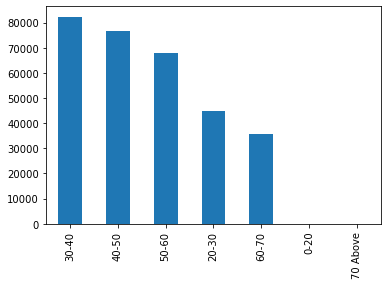

In [92]:
#using plot
df1['AGE_GRP'].value_counts().plot.bar()
plt.show()

#### Observations: maximum persons are in the age range of 30-40

In [69]:
#DAYS_EMPLOYMENT , DAYS_REGISTRATION, DAYS_ID_PUBLISH need to be changed in to years. 
df1.DAYS_EMPLOYED=df1.DAYS_EMPLOYED.apply(lambda x:abs(x//365))
df1.DAYS_REGISTRATION = df1.DAYS_REGISTRATION.apply(lambda x: abs(x//365))
df1.DAYS_ID_PUBLISH = df1.DAYS_ID_PUBLISH.apply(lambda x: abs(x//365))
df1.rename({'DAYS_EMPLOYED':'EMPLOYED_YRS','DAYS_REGISTRATION':'REGISTRATION_YRS', 'DAYS_ID_PUBLISH':'ID_PUBLISH_YRS'}, axis=1, inplace=True)

In [70]:
#Recheck column names

df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'EMPLOYED_YRS', 'REGISTRATION_YRS', 'ID_PUBLISH_YRS', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 

### 3.3 Handling XNA values

In [71]:
# CODE_GENDER column
df1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [72]:
# Since most of values belong to Female category hence replacing XNA value with F 
df1.loc[df1.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
df1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [73]:
# ORGANIZATION_TYPE column 
df1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [74]:
# Replace with NaN value
df1 = df1.replace('XNA',np.NaN)

### 3.5  Binning of continuous variables

In [75]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
df1['INCOME_RANGE'] = pd.qcut(df1.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df1['INCOME_RANGE'].head(20)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
11     VERY_LOW
12     VERY_LOW
13       MEDIUM
14       MEDIUM
15       MEDIUM
16          LOW
17     VERY_LOW
18          LOW
19     VERY_LOW
Name: INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [76]:
# Binning 'AMT_CREDIT_RANGE' by creating various ranges
df1['CREDIT_RANGE'] = pd.qcut(df1.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df1['CREDIT_RANGE'].head()

0         LOW
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

### 3.4 Checking for imbalance in Target

##### Target variable 1 - client with payment difficulties
##### Target variable 0 - all other cases, ie no payment difficulties

In [77]:
df1['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [78]:
# No payment difficulties 
df1_target_0 = df1.loc[df1.TARGET == 0]
df1_target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,EMPLOYED_YRS,REGISTRATION_YRS,ID_PUBLISH_YRS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,APPLICANT_AGE,AGE_GRP,INCOME_RANGE,CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,3,3.0,0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,40-50,HIGH,HIGH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,0,11.0,6,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,50-60,VERY_LOW,VERY_LOW
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,8,26.0,6,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.068493,50-60,LOW,LOW
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,8,11.0,9,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,50-60,LOW,LOW
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,4,13.0,1,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46.413699,40-50,VERY_LOW,LOW


In [79]:
# Loan Payment Difficulties
df1_target_1 = df1.loc[df1.TARGET == 1]
df1_target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,EMPLOYED_YRS,REGISTRATION_YRS,ID_PUBLISH_YRS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,APPLICANT_AGE,AGE_GRP,INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,1,9.0,5,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,20-30,MEDIUM,LOW
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,7,18.0,5,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,10.0,1.0,10.0,0.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51.298630,50-60,LOW,HIGH
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,3,3.0,2,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,47.895890,40-50,MEDIUM,HIGH
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,9,0.0,12,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,1.0,0.0,1.0,0.0,1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,36.668493,30-40,LOW,LOW
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,1000,14.0,11,1,0,0,1,0,0,Laborers,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,NaN,0.023952,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,67.928767,60-70,VERY_LOW,VERY_LOW


## 4. ANALYSIS

### 4.1  Identifying Outliers

In [80]:
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,EMPLOYED_YRS,REGISTRATION_YRS,ID_PUBLISH_YRS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,APPLICANT_AGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,185.021521,13.168683,7.713474,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,1.417523,0.142944,1.400626,0.099717,962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447,43.936973
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,381.972190,9.646841,4.134515,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,2.398395,0.446033,2.377224,0.361735,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821,11.956133
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,2.000000,5.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.

### From describe() we  find all the columns having high difference between max and 75 percentile and the columns having extremely high values

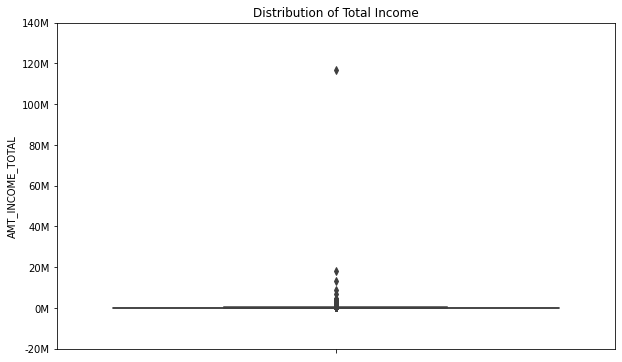

In [81]:
# Boxplot for 'AMT_INCOME_TOTAL' column to check the outliers
plt.figure(figsize=[10,6])

box_image = sns.boxplot(data=df1, y="AMT_INCOME_TOTAL")
yticks = [str(round(i))+"M" for i in box_image.get_yticks()/1000000]
plt.yticks(box_image.get_yticks(), yticks)
plt.title('Distribution of Total Income')
plt.show()

#### Observation :  we can observe that there is some value around 120M which is  an outlier.

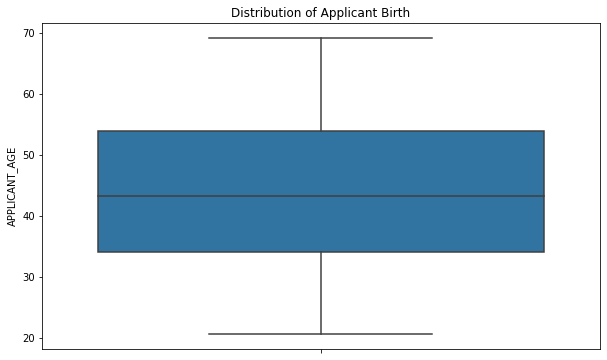

In [82]:
# Box plot for checking outlier of APPLICANT_AGE

plt.figure(figsize=[10,6])
box = sns.boxplot(data=df1, y="APPLICANT_AGE")
plt.title('Distribution of Applicant Birth')
plt.show()

 #### Observation : We did not find any outliers in the column APPLICANT_AGE

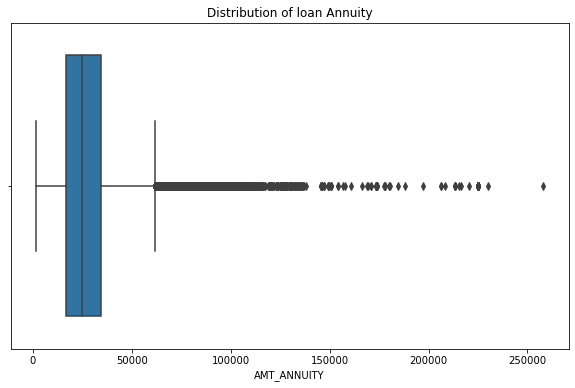

In [83]:
# Box plot for checking outlier of AMT_ANNUITY
plt.figure(figsize=[10,6])
box = sns.boxplot(data=df1, x="AMT_ANNUITY")
plt.title('Distribution of loan Annuity')
plt.show()

 #### Observation : In the column AMT_ANNUITY, we have found one outlier which is greater than 250000. 

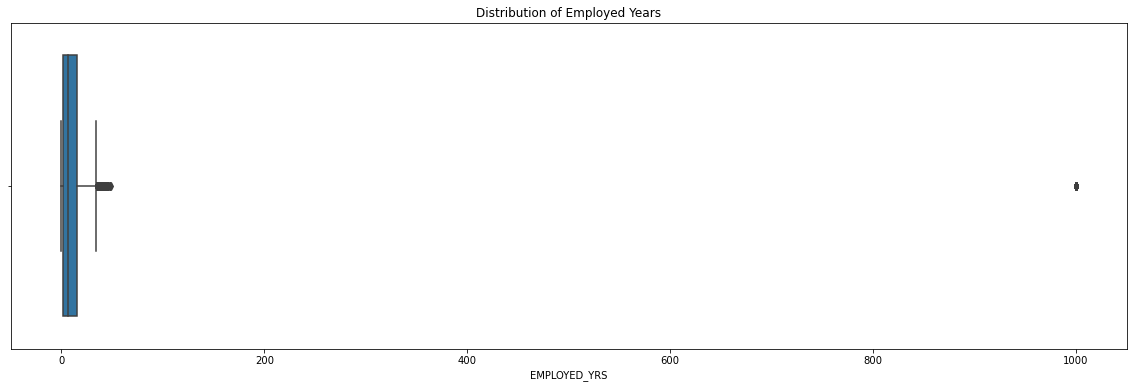

In [84]:
# distribution of 'EMPLOYED_YRS'
plt.figure(figsize=[20,6])
box = sns.boxplot(data=df1, x="EMPLOYED_YRS")
plt.title('Distribution of Employed Years')
plt.show()

#### Observation : EMPLOYED_YRS column tells us, number of days person started current employment before the application. we observe value greater than 1000 which is surely outlier.

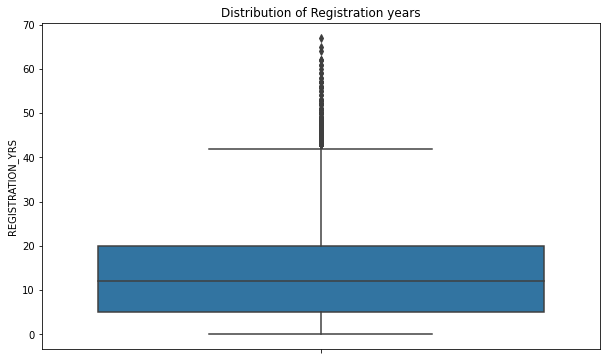

In [85]:
# Box plot for checking outlier of REGISTRATION_YRS
plt.figure(figsize=[10,6])
box = sns.boxplot(data=df1, y="REGISTRATION_YRS")
plt.title('Distribution of Registration years')
plt.show()

 ##### Observation :  registration_yrs is a column which tells us how many days before the application, the client changed his registration. Here we have observed the value to be 70 years which is an outlier.

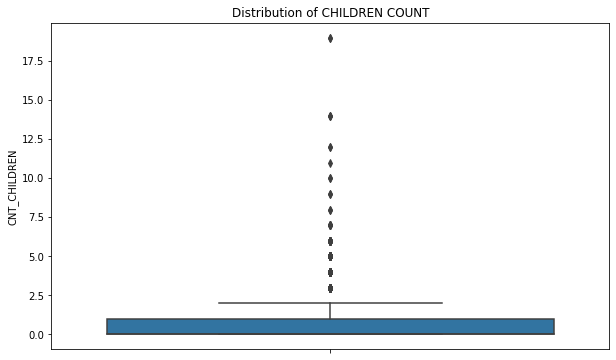

In [86]:
# Box plot for checking outlier of CNT_CHILDREN
plt.figure(figsize=[10,6])
box = sns.boxplot(data=df1, y="CNT_CHILDREN")
plt.title('Distribution of CHILDREN COUNT')
plt.show()

#### Observation : CNT_CHILDREN column have outlier near to the value of 18

### 4.2 Checking the distribution

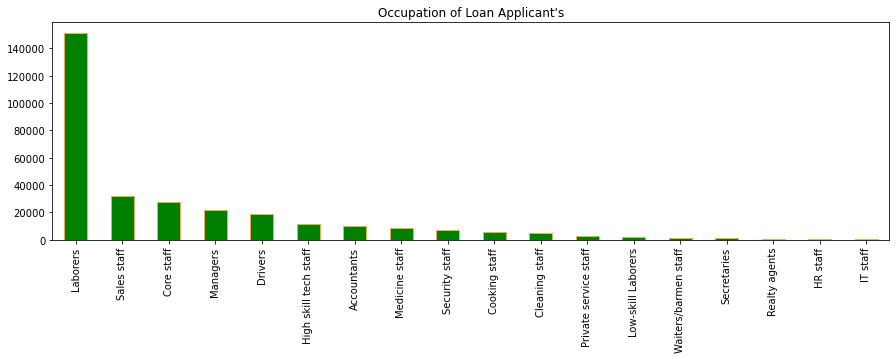

In [93]:
# Distribution of OCCUPATION_TYPE using Bar plot
occupation_type = df1["OCCUPATION_TYPE"].value_counts()
plt.figure(figsize=(15,4))
occupation_type.plot(kind='bar', color='green', edgecolor="#f2a85b")
title = 'Occupation of Loan Applicant\'s'
plt.title(title)
plt.show()

#### Observation - Here we can see that, Laborers have highest count also  Sales Staff and Core Staff has majority whereas IT Staff has the lowest count for application of loans.

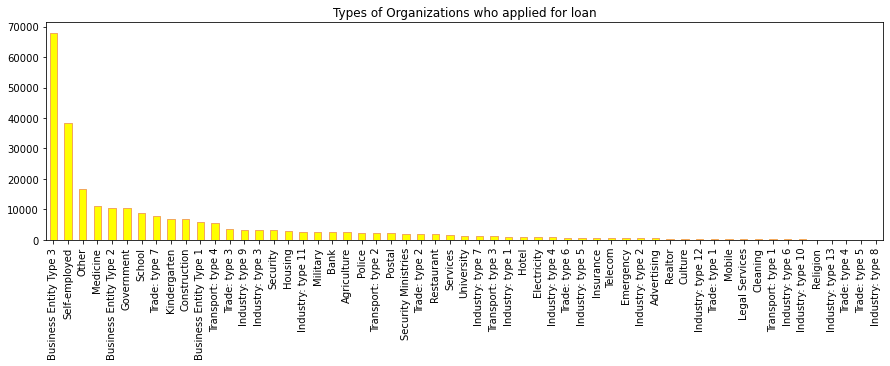

In [94]:
# Distribution of ORGANIZATION_TYPE using Bar plot

occupation_type = df1["ORGANIZATION_TYPE"].value_counts()
plt.figure(figsize=(15,4))
occupation_type.plot(kind='bar', color="yellow", edgecolor="#f2a85b")
title = 'Types of Organizations who applied for loan'
plt.title(title)
plt.show()

#### Observation - Business Entity type 3 has highest count for applying for loan 

### 4.3 Univariate Analysis

#### 4.3.1 Gender Distribution according to the target variable

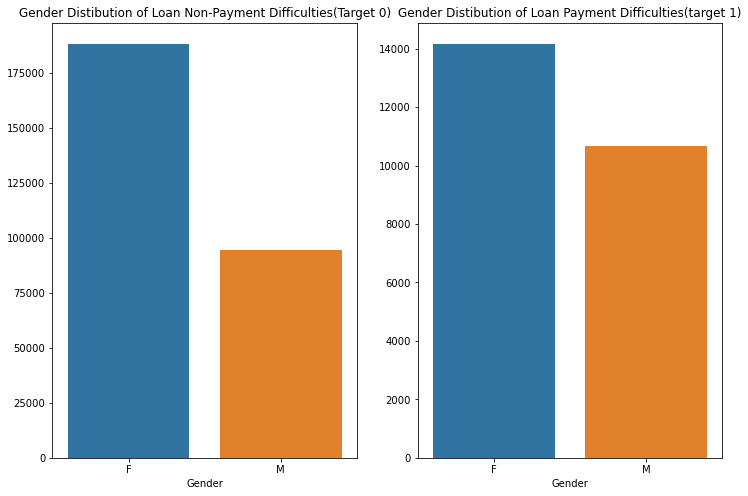

In [95]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.barplot(y=df1_target_0["CODE_GENDER"].value_counts().values,x = df1_target_0["CODE_GENDER"].value_counts().index,orient='v')
title = 'Gender Distibution of Loan Non-Payment Difficulties(Target 0)'
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.title(title)
plt.subplot(1,2,2)
sns.barplot(y=df1_target_1["CODE_GENDER"].value_counts().values,x = df1_target_1["CODE_GENDER"].value_counts().index,orient='v')
title = 'Gender Distibution of Loan Payment Difficulties(target 1)'
plt.xticks(rotation=0)
plt.title(title)
plt.xlabel('Gender')
plt.show()

#### Observation : We can observe that there's not much difference in defaulter and non-defaulter females but the males defaulter ratio is higher than non-defaulters

#### 4.3.2 Credit Amount Distibution

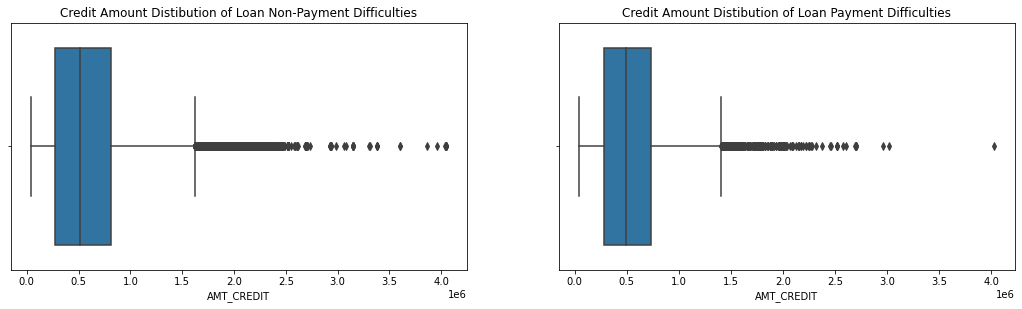

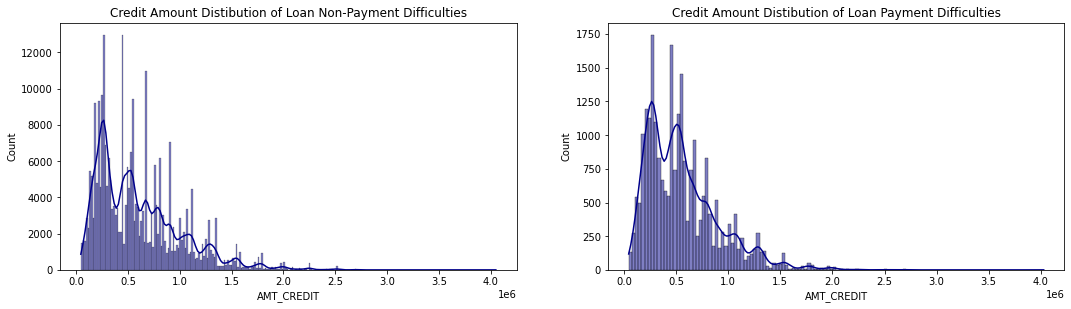

In [96]:
plt.figure(figsize = (18,10))
plt.subplot(2,2,1)
sns.boxplot(df1_target_0["AMT_CREDIT"])
title = 'Credit Amount Distibution of Loan Non-Payment Difficulties'
plt.xticks(rotation=0)
plt.xlabel('AMT_CREDIT')
plt.title(title)

plt.subplot(2,2,2)
sns.boxplot(df1_target_1["AMT_CREDIT"])
title = 'Credit Amount Distibution of Loan Payment Difficulties'
plt.xticks(rotation=0)
plt.xlabel('AMT_CREDIT')
plt.title(title)
plt.show()

plt.figure(figsize = (18,10))
plt.subplot(2,2,1)
sns.histplot(df1_target_0["AMT_CREDIT"],color="darkblue", kde=True)
title = 'Credit Amount Distibution of Loan Non-Payment Difficulties'
plt.xticks(rotation=0)
plt.title(title)
plt.xlabel('AMT_CREDIT')

plt.subplot(2,2,2)
sns.histplot(df1_target_1["AMT_CREDIT"],color="darkblue", kde=True)
title = 'Credit Amount Distibution of Loan Payment Difficulties'
plt.xticks(rotation=0)
plt.title(title)
plt.xlabel('AMT_CREDIT')
plt.show()

#### Observation - 
* We can observe that there are  few outliers in both the credit amount customers that is payment difficulty customers and payment non-difficulty customers
* We can also see that the distribution does not appear to be bell or normal curve. The distribution is more inclined towards the first quartile.

#### 4.3.3. Credit Range Distribution

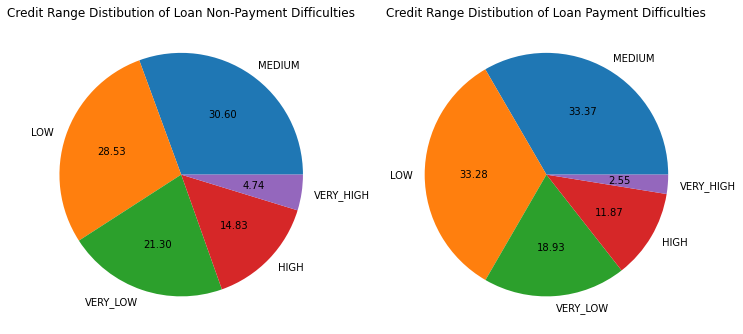

In [100]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.pie(df1_target_0['CREDIT_RANGE'].value_counts().values, labels=df1['CREDIT_RANGE'].value_counts().index,autopct='%.2f')
title = 'Credit Range Distibution of Loan Non-Payment Difficulties'
plt.title(title)
plt.subplot(1,2,2)
plt.pie(df1_target_1['CREDIT_RANGE'].value_counts().values, labels=df1['CREDIT_RANGE'].value_counts().index,autopct='%.2f')
title = 'Credit Range Distibution of Loan Payment Difficulties'

plt.title(title)
plt.show()

#### Observation - We can observe that customers with very low and low credit range default more as compared to the others categories

#### 4.3.4. Children Count Distribution

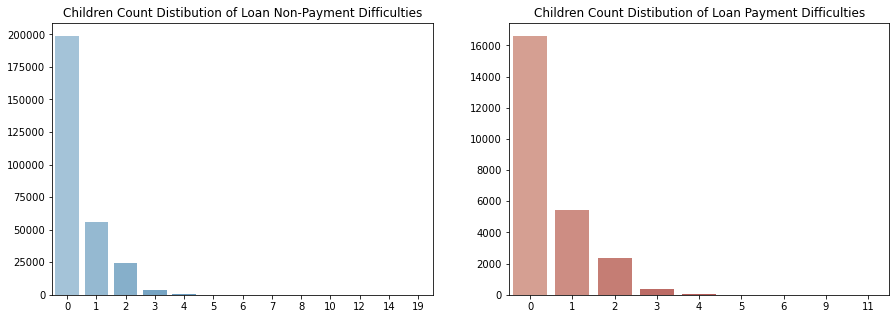

In [101]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x=df1_target_0['CNT_CHILDREN'].value_counts().index,y=df1_target_0['CNT_CHILDREN'].value_counts().values,palette="Blues_d")
title = 'Children Count Distibution of Loan Non-Payment Difficulties'
plt.title(title)
plt.subplot(1,2,2)
sns.barplot(x=df1_target_1['CNT_CHILDREN'].value_counts().index,y=df1_target_1['CNT_CHILDREN'].value_counts().values,palette="Reds_d", saturation=.5)
title = 'Children Count Distibution of Loan Payment Difficulties'

plt.title(title)
plt.show()

#### Observation : There does not seem to be any such pattern for the number of children of defaulters and non-defaulters.

#### 4.3.5 Income Range Distibution

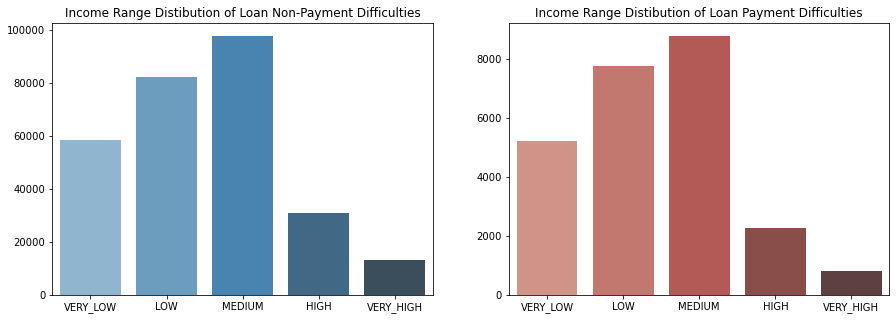

In [102]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x=df1_target_0['INCOME_RANGE'].value_counts().index,y=df1_target_0['INCOME_RANGE'].value_counts().values,palette="Blues_d")
title = 'Income Range Distibution of Loan Non-Payment Difficulties'
plt.title(title)

plt.subplot(1,2,2)
sns.barplot(x=df1_target_1['INCOME_RANGE'].value_counts().index,y=df1_target_1['INCOME_RANGE'].value_counts().values,palette="Reds_d", saturation=.5)
title = 'Income Range Distibution of Loan Payment Difficulties'

plt.title(title)
plt.show()

#### Observation - We can observe that with growing income the defaulters seem to decrease that is people with lower income range tend to default more as compared to those with higher income ranges.

#### 4.3.6 Employed Years Distribution

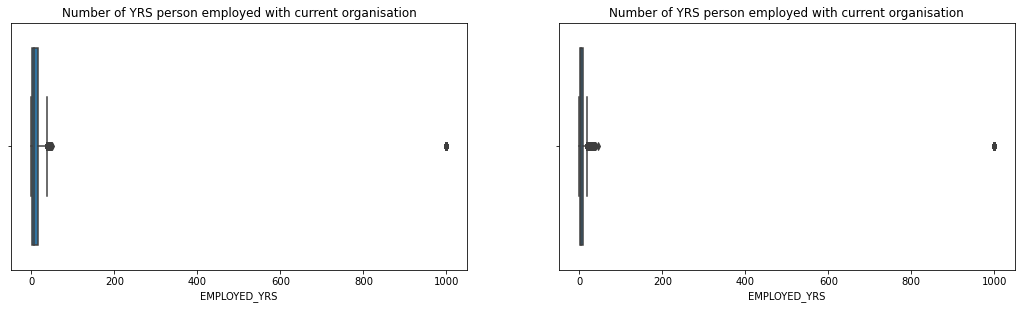

In [103]:
plt.figure(figsize = (18,10))
plt.subplot(2,2,1)
sns.boxplot(df1_target_0["EMPLOYED_YRS"])
title = 'Number of YRS person employed with current organisation'
plt.xticks(rotation=0)
plt.xlabel('EMPLOYED_YRS')
plt.title(title)

plt.subplot(2,2,2)
sns.boxplot(df1_target_1["EMPLOYED_YRS"])
title = 'Number of YRS person employed with current organisation'
plt.xticks(rotation=0)
plt.xlabel('EMPLOYED_YRS')
plt.title(title)
plt.show()

#### Observation - We can observe that there are few outliers in our data for the number of yrs a person is employed with his current organisation. Since one value is clearly  approximately equal to 958 years which is an outlier. 

#### 4.3.7 Age Group wise Distibution

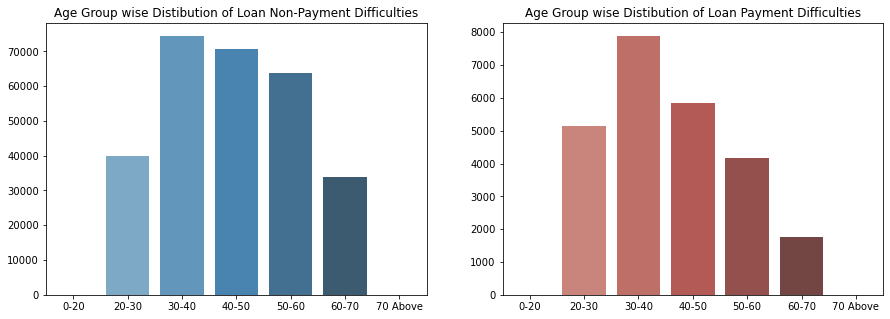

In [104]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x=df1_target_0['AGE_GRP'].value_counts().index,y=df1_target_0['AGE_GRP'].value_counts().values,palette="Blues_d")
title = 'Age Group wise Distibution of Loan Non-Payment Difficulties'
plt.title(title)
plt.subplot(1,2,2)
sns.barplot(x=df1_target_1['AGE_GRP'].value_counts().index,y=df1_target_1['AGE_GRP'].value_counts().values,palette="Reds_d", saturation=.5)
title = 'Age Group wise Distibution of Loan Payment Difficulties'

plt.title(title)
plt.show()

#### Observation - We can observe that middle-aged people and young people tend to default more as compared to other age groups(younger and older).

#### 4.3.8 Goods Price Distibution

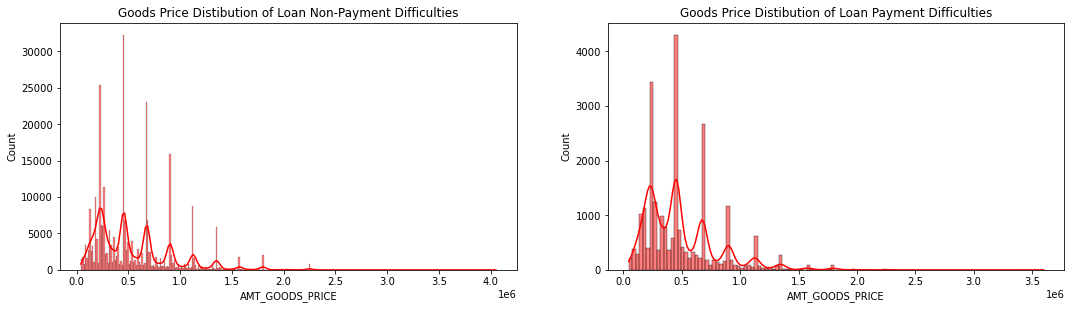

In [132]:
plt.figure(figsize = (18,10))
plt.subplot(2,2,1)
sns.histplot(df1_target_0["AMT_GOODS_PRICE"],color="red", kde=True)
title = 'Goods Price Distibution of Loan Non-Payment Difficulties'
plt.xticks(rotation=0)
plt.title(title)
plt.xlabel('AMT_GOODS_PRICE')

plt.subplot(2,2,2)
sns.histplot(df1_target_1["AMT_GOODS_PRICE"],color="red", kde=True)
title = 'Goods Price Distibution of Loan Payment Difficulties'
plt.xticks(rotation=0)
plt.title(title)
plt.xlabel('AMT_GOODS_PRICE')
plt.show()

#### Observation - We can infer that most of the defaulters tend to lie in the first quartile of the region and the curve is not a normal or bell curve.

#### 4.3.9 Income Type Distribution

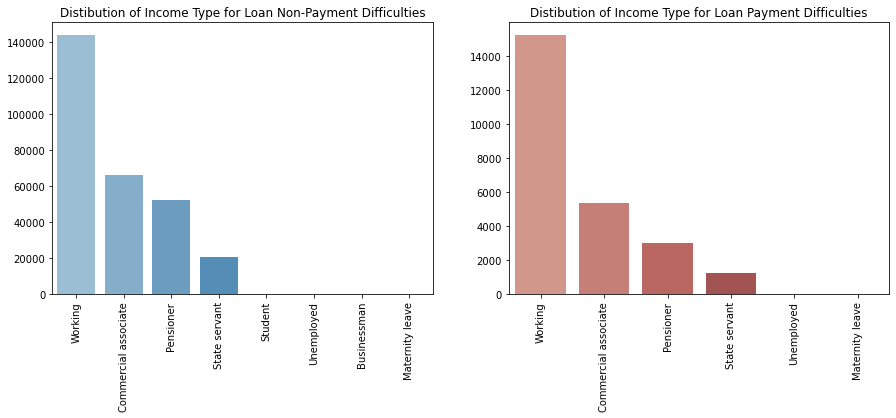

In [106]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x=df1_target_0['NAME_INCOME_TYPE'].value_counts().index,y=df1_target_0['NAME_INCOME_TYPE'].value_counts().values,palette="Blues_d")
title = 'Distibution of Income Type for Loan Non-Payment Difficulties'
plt.title(title)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x=df1_target_1['NAME_INCOME_TYPE'].value_counts().index,y=df1_target_1['NAME_INCOME_TYPE'].value_counts().values,palette="Reds_d", saturation=.5)
title = 'Distibution of Income Type for Loan Payment Difficulties'
plt.xticks(rotation=90)
plt.title(title)
plt.show()

#### Observaion-
* We can see that Working people have majority in Non payment and payment difficulties 
* No businessman and maternity leave employees and unemployed are there in Payment difficulty 

#### 4.3.10.Family Status Distribution

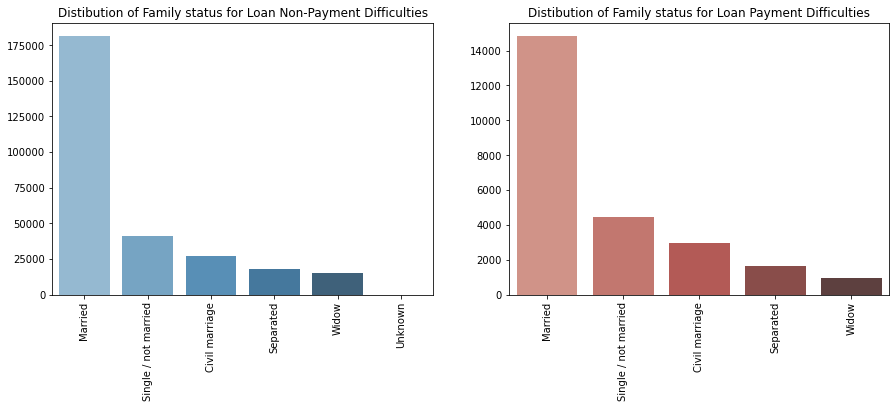

In [107]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x=df1_target_0['NAME_FAMILY_STATUS'].value_counts().index,y=df1_target_0['NAME_FAMILY_STATUS'].value_counts().values,palette="Blues_d")
title = 'Distibution of Family status for Loan Non-Payment Difficulties'
plt.title(title)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x=df1_target_1['NAME_FAMILY_STATUS'].value_counts().index,y=df1_target_1['NAME_FAMILY_STATUS'].value_counts().values,palette="Reds_d", saturation=.5)
title = 'Distibution of Family status for Loan Payment Difficulties'
plt.xticks(rotation=90)
plt.title(title)
plt.show()

#### Observtion- 
* There is decrease in the percentage of married and widowed with in Payment Difficulties
* There is Increase in the percentage of Single/Not married and Civil marriage in Loan Payment Difficulties

#### 2.9.11 Housing Type Distribution

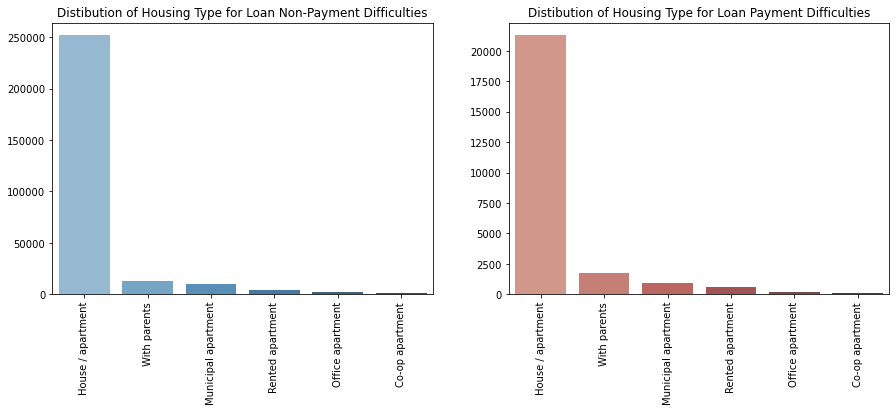

In [108]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x=df1_target_0['NAME_HOUSING_TYPE'].value_counts().index,y=df1_target_0['NAME_HOUSING_TYPE'].value_counts().values,palette="Blues_d")
title = 'Distibution of Housing Type for Loan Non-Payment Difficulties'
plt.title(title)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x=df1_target_1['NAME_HOUSING_TYPE'].value_counts().index,y=df1_target_1['NAME_HOUSING_TYPE'].value_counts().values,palette="Reds_d", saturation=.5)
title = 'Distibution of Housing Type for Loan Payment Difficulties'
plt.xticks(rotation=90)
plt.title(title)
plt.show()

#### Observation -
* We can see that there exists people who own house/apartment are in both Loan Non-Payment Difficulties and  Payment Difficulties

#### 4.3.12 Education Type Distribution

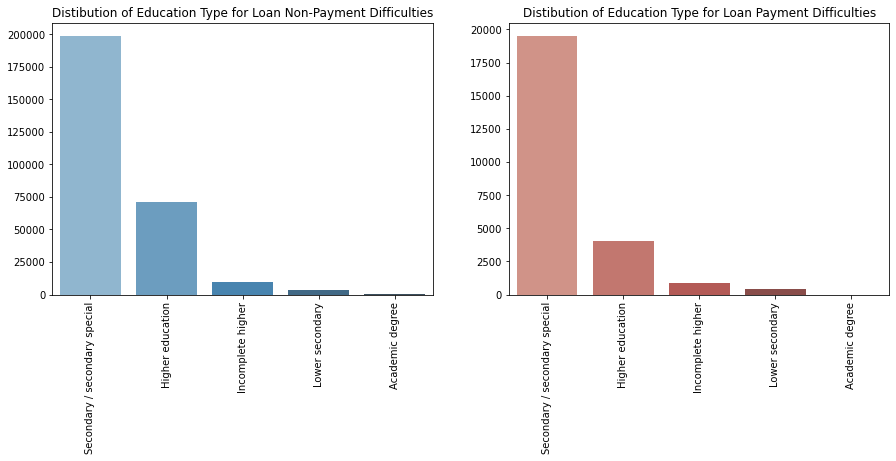

In [109]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x=df1_target_0['NAME_EDUCATION_TYPE'].value_counts().index,y=df1_target_0['NAME_EDUCATION_TYPE'].value_counts().values,palette="Blues_d")
title = 'Distibution of Education Type for Loan Non-Payment Difficulties'
plt.title(title)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x=df1_target_1['NAME_EDUCATION_TYPE'].value_counts().index,y=df1_target_1['NAME_EDUCATION_TYPE'].value_counts().values,palette="Reds_d", saturation=.5)
title = 'Distibution of Education Type for Loan Payment Difficulties'
plt.xticks(rotation=90)
plt.title(title)
plt.show()

#### Observtion- 
* We can conclude that secondary/secondary special educated people applying for loan have high percentage
* Academic degree people have very lower percentage in applying for loan

#### 4.3.13 Type Suite Distribution

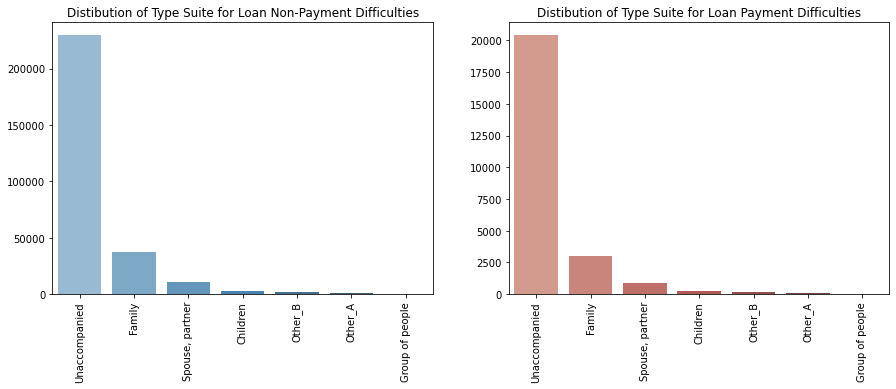

In [110]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x=df1_target_0['NAME_TYPE_SUITE'].value_counts().index,y=df1_target_0['NAME_TYPE_SUITE'].value_counts().values,palette="Blues_d")
title = 'Distibution of Type Suite for Loan Non-Payment Difficulties'
plt.title(title)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x=df1_target_1['NAME_TYPE_SUITE'].value_counts().index,y=df1_target_1['NAME_TYPE_SUITE'].value_counts().values,palette="Reds_d", saturation=.5)
title = 'Distibution of Type Suite for Loan Payment Difficulties'
plt.xticks(rotation=90)
plt.title(title)
plt.show()

#### Observation- little changes are there in both graphs for people with payment difficulties and without payment difficulties

#### 4.3.13 Loan Contract Type Distribution

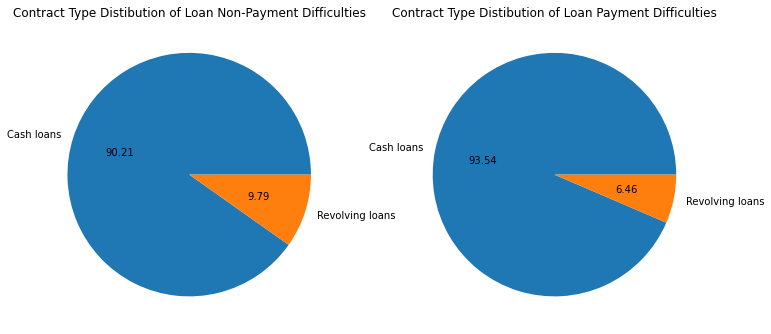

In [111]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.pie(df1_target_0['NAME_CONTRACT_TYPE'].value_counts().values, labels=df1['NAME_CONTRACT_TYPE'].value_counts().index,autopct='%.2f')
title = 'Contract Type Distibution of Loan Non-Payment Difficulties'
plt.title(title)
plt.subplot(1,2,2)
plt.pie(df1_target_1['NAME_CONTRACT_TYPE'].value_counts().values, labels=df1['NAME_CONTRACT_TYPE'].value_counts().index,autopct='%.2f')
title = 'Contract Type Distibution of Loan Payment Difficulties'

plt.title(title)
plt.show()

#### Observation -
* We can Conculde that cash loans are preferred by both Loan Payment Difficulties and Loan-Non Payment Difficulties 
* There is a decrease in the percentage of Payment Difficulties for revolving loans.

#### 4.3.14 Organization Type Distribution

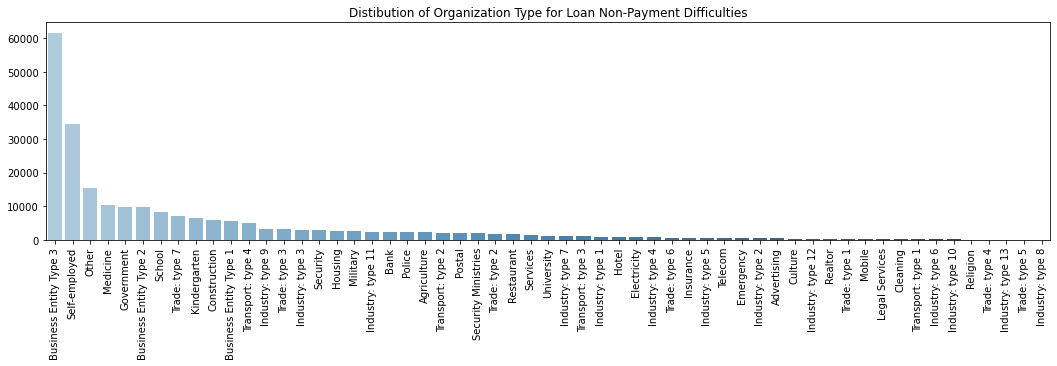

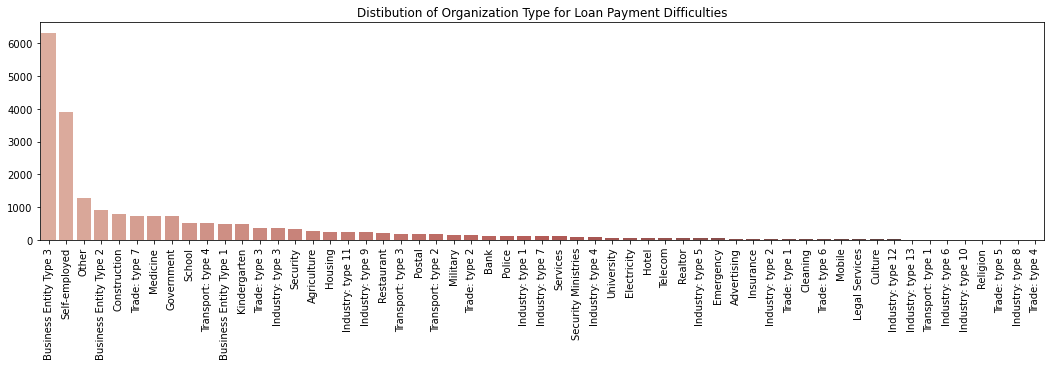

In [112]:
plt.figure(figsize = (18,4))

sns.barplot(x=df1_target_0['ORGANIZATION_TYPE'].value_counts().index,y=df1_target_0['ORGANIZATION_TYPE'].value_counts().values,palette="Blues_d")
title = 'Distibution of Organization Type for Loan Non-Payment Difficulties'
plt.title(title)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize = (18,4))
sns.barplot(x=df1_target_1['ORGANIZATION_TYPE'].value_counts().index,y=df1_target_1['ORGANIZATION_TYPE'].value_counts().values,palette="Reds_d", saturation=.5)
title = 'Distibution of Organization Type for Loan Payment Difficulties'
plt.xticks(rotation=90)
plt.title(title)
plt.show()

#### Observation- There is no major change can  be seen here

### 4.4 Bi-Variate analysis

 ####  4.4.1 Bi-Variate analysis for numerical columns

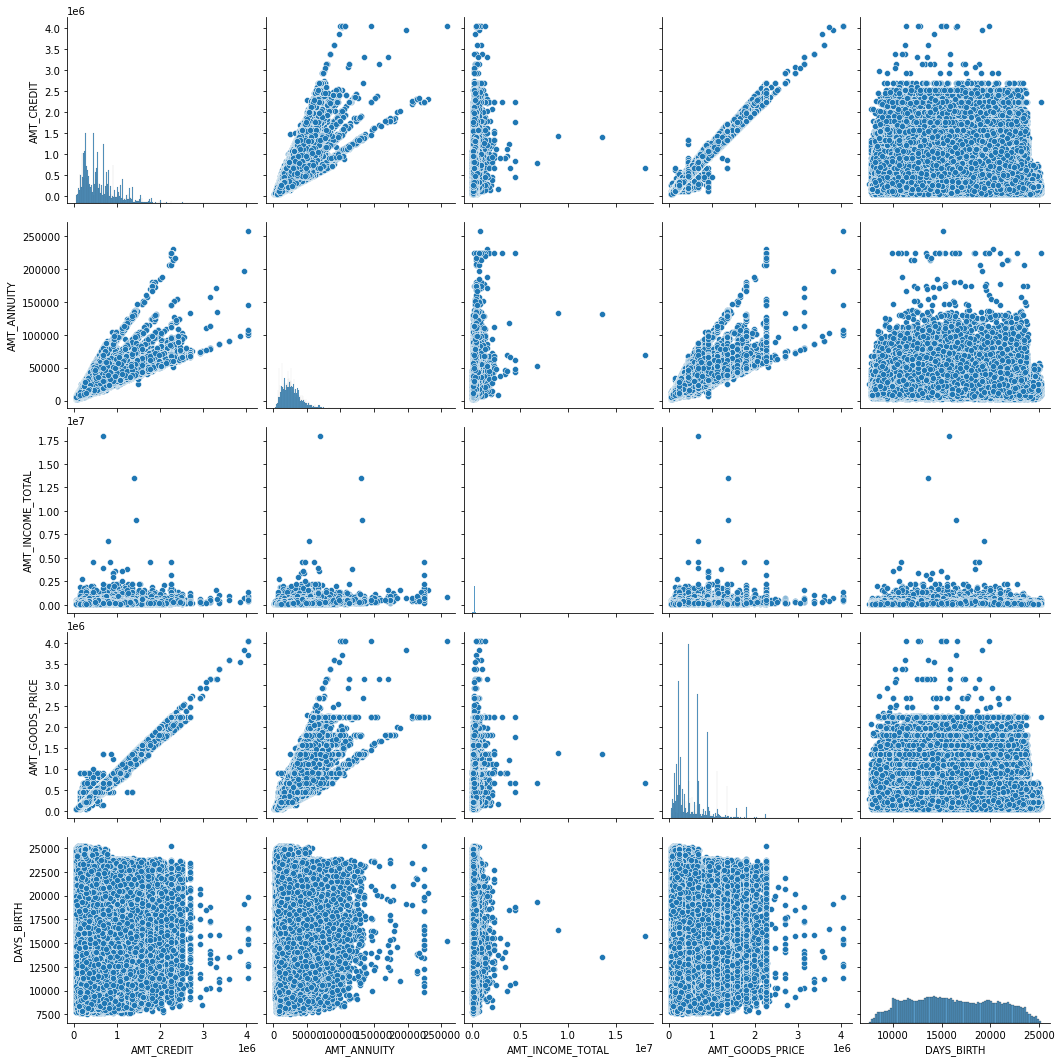

In [135]:
Numerical_columns = df1_target_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(Numerical_columns,diag_kind="hist", height=3)
plt.show()

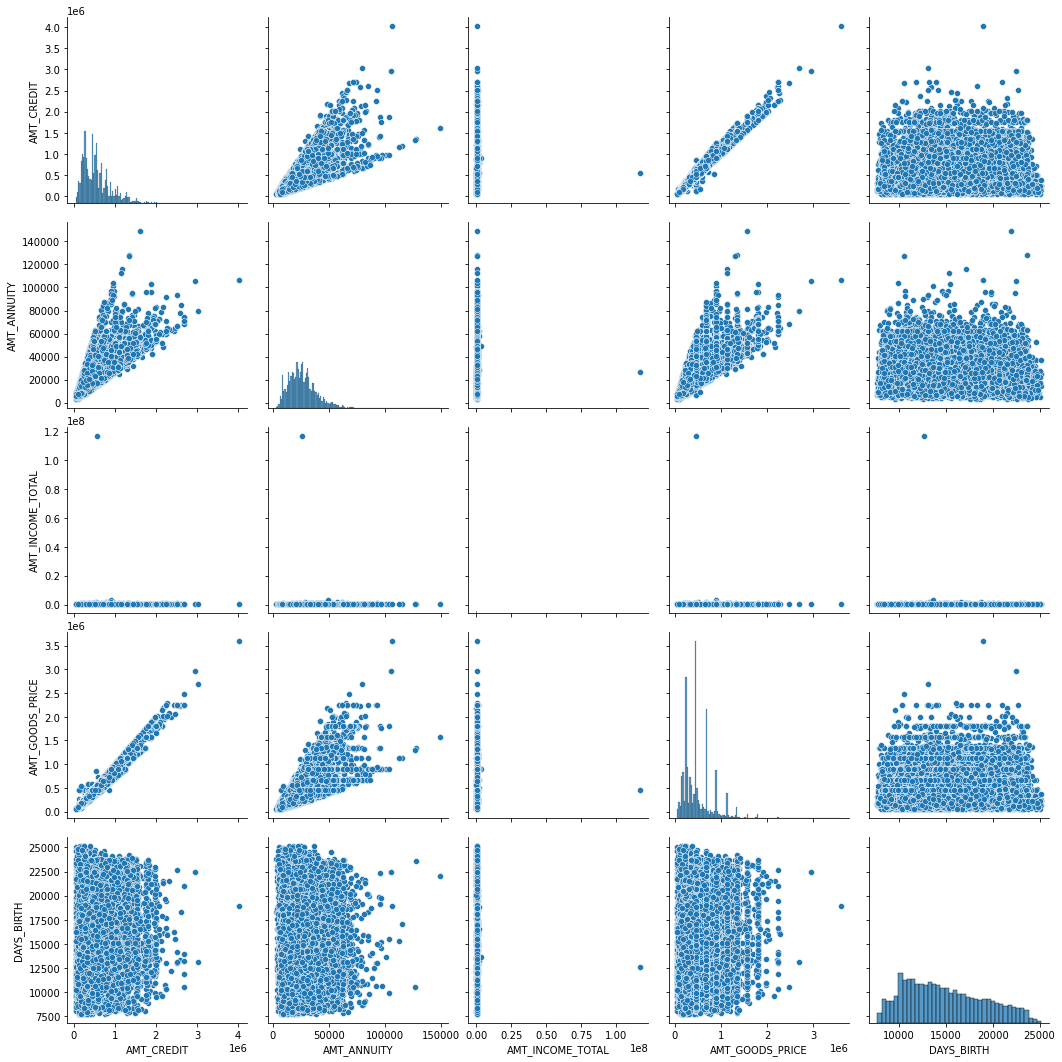

In [126]:
Numerical_columns = df1_target_1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(Numerical_columns,diag_kind="hist", height=3)

#### Observation- 
* We can observe  that there is high positive co-relation between goods price and Amount credit. there also appears to be some corelation between goods price and amount annuity for Non payment diffculty 
* We can observe that there is high co-relation between annuity amount and goods price for Payment difficulty customers.

#### 4.4.2 Bivariate Analysis of Categorical vs Numerical Variables

#### 4.4.2.1 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' 

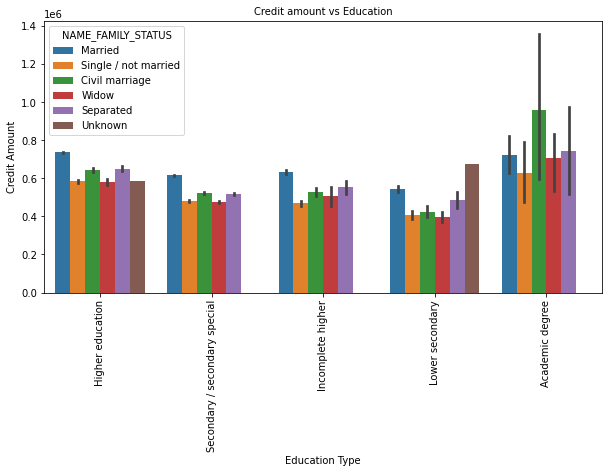

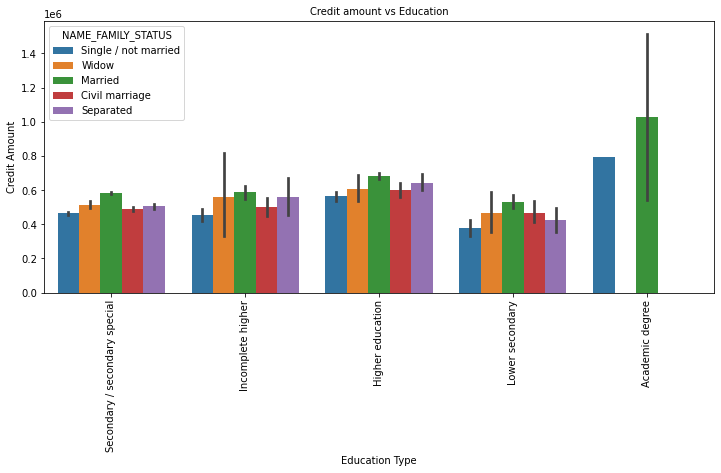

In [142]:
plt.figure(figsize = (10,5))
sns.barplot(x=df1_target_0.NAME_EDUCATION_TYPE, y= df1_target_0.AMT_CREDIT,hue=df1_target_0.NAME_FAMILY_STATUS)
plt.title('Credit amount vs Education', fontsize = 10)
plt.xticks(rotation=90)
plt.xlabel('Education Type', fontsize = 10)
plt.ylabel('Credit Amount', fontsize = 10)
plt.show()

plt.figure(figsize = (12,5))
sns.barplot(x=df1_target_1.NAME_EDUCATION_TYPE, y= df1_target_1.AMT_CREDIT,hue=df1_target_1.NAME_FAMILY_STATUS)
plt.title('Credit amount vs Education', fontsize = 10)
plt.xticks(rotation=90)
plt.xlabel('Education Type', fontsize = 10)
plt.ylabel('Credit Amount', fontsize = 10)
plt.show()

#### Observation: 
* People with academic degree (Single & Married) have high credit amount for defaulters compared to rest of educated people.
* We can conclude that people with academic degree (single, separated and widows) tend to default lesser compared to other categories.

#### 4.4.2.2 'INCOME_RANGE' vs 'AMT_CREDIT' 

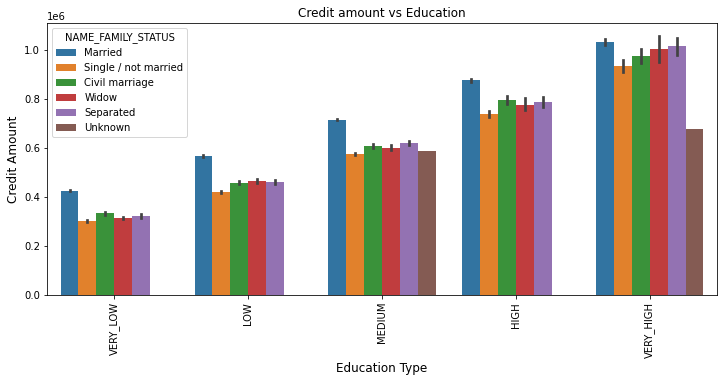

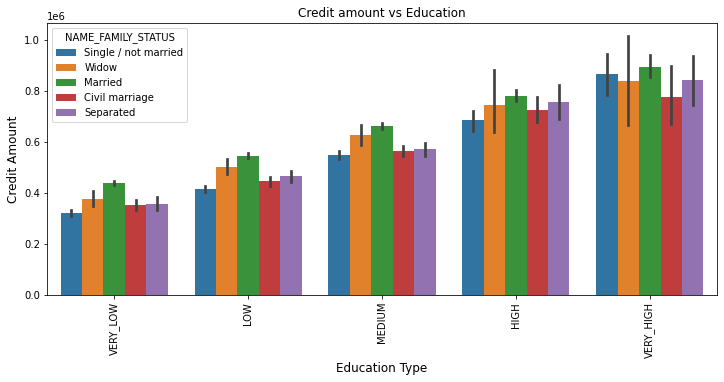

In [143]:
plt.figure(figsize = (12,5))
sns.barplot(x=df1_target_0.INCOME_RANGE, y= df1_target_0.AMT_CREDIT,hue=df1_target_0.NAME_FAMILY_STATUS)
plt.title('Credit amount vs Education', fontsize = 12)
plt.xticks(rotation=90)
plt.xlabel('Education Type', fontsize = 12)
plt.ylabel('Credit Amount', fontsize = 12)
plt.show()

plt.figure(figsize = (12,5))
sns.barplot(x=df1_target_1.INCOME_RANGE, y= df1_target_1.AMT_CREDIT,hue=df1_target_1.NAME_FAMILY_STATUS)
plt.title('Credit amount vs Education', fontsize = 12)
plt.xticks(rotation=90)
plt.xlabel('Education Type', fontsize = 12)
plt.ylabel('Credit Amount', fontsize = 12)
plt.show()

#### Observation- In Income range very high, family status of Married, single and seperated have high credit amount 

## PREVIOUS APPLICATION DATAFRAME

In [ ]:
df2.shape

In [145]:
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [146]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [147]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [148]:
# XNA and XAP are replaced by NaN
df2=df2.replace('XNA', np.NaN)
df2=df2.replace('XAP', np.NaN)

### Univariate analysis

### 1. Loan type distribution status

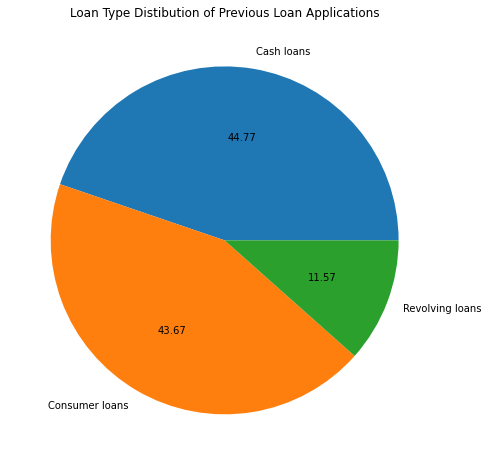

In [144]:
plt.figure(figsize=[10,8])
plt.pie((df2.NAME_CONTRACT_TYPE.value_counts()/len(df2)*100).values, labels=(df2.NAME_CONTRACT_TYPE.value_counts()/len(df2)*100).index,autopct='%.2f')
title = 'Loan Type Distibution of Previous Loan Applications'
plt.title(title)
plt.show()

#### Observation-We can observe that most of our consumer's contract product type lies either in Consumer Loan category or Cash Loan Category

### 2. Loan type contract

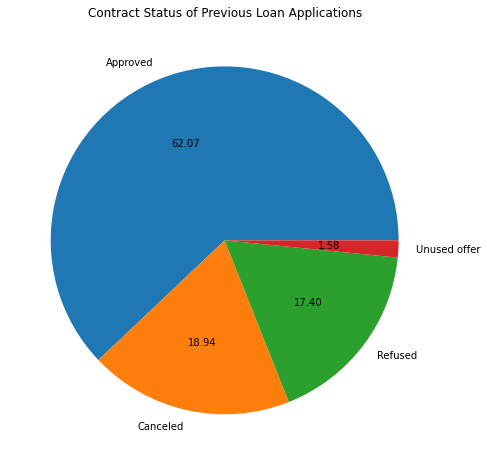

In [149]:
plt.figure(figsize=[10,8])
plt.pie((df2.NAME_CONTRACT_STATUS.value_counts()/len(df2)*100).values, labels=(df2.NAME_CONTRACT_STATUS.value_counts()/len(df2)*100).index,autopct='%.2f')
title = 'Contract Status of Previous Loan Applications'
plt.title(title)
plt.show()

#### Observation-We can observe that most of our consumer's contract have been approved (62.07%), Only a few were unused (1.58%)

### 3. Payment type

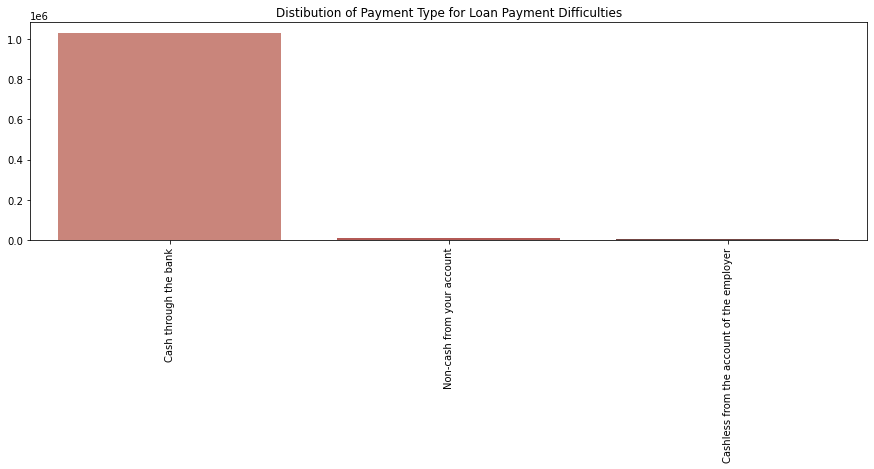

Cash through the bank                        61.881412
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64


In [164]:
plt.figure(figsize=[15,4])
sns.barplot(x=df2['NAME_PAYMENT_TYPE'].value_counts().index,y=df2['NAME_PAYMENT_TYPE'].value_counts().values,palette="Reds_d", saturation=.5)
title = 'Distibution of Payment Type for Loan Payment Difficulties'
plt.xticks(rotation=90)
plt.title(title)##
plt.show()
print(df2['NAME_PAYMENT_TYPE'].value_counts()/len(df2)*100)

#### Conclusion: most of the customers will do payment by taking cash from the bank

### 4. Client Type

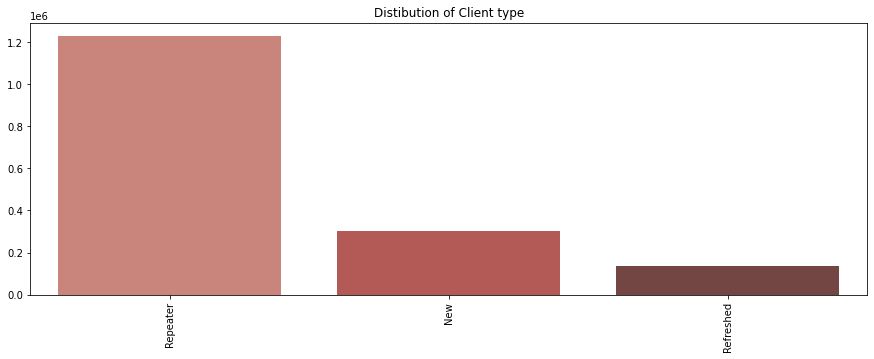

Repeater     73.718757
New          18.043376
Refreshed     8.121654
Name: NAME_CLIENT_TYPE, dtype: float64


In [151]:
plt.figure(figsize=[15,5])
sns.barplot(x=df2['NAME_CLIENT_TYPE'].value_counts().index,y=df2['NAME_CLIENT_TYPE'].value_counts().values,palette="Reds_d", saturation=.5)
title = 'Distibution of Client type'
plt.xticks(rotation=90)
plt.title(title)##
plt.show()
print(df2['NAME_CLIENT_TYPE'].value_counts()/len(df2)*100)

Observations: Most clients who are applying are repeaters

### 5. Reasons of previous application rejection

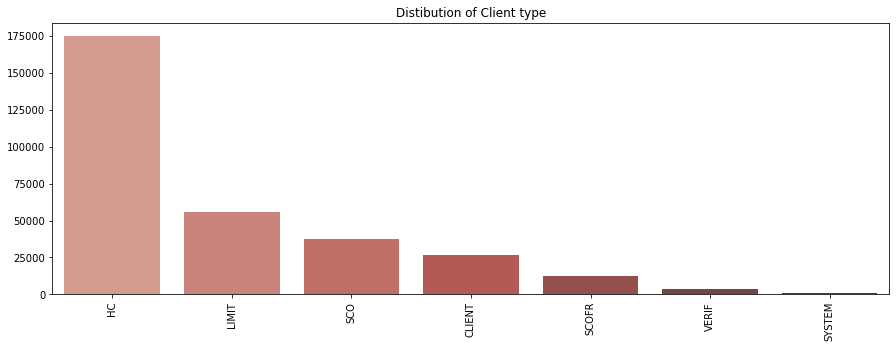

HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64


In [152]:
plt.figure(figsize=[15,5])
sns.barplot(x=df2['CODE_REJECT_REASON'].value_counts().index,y=df2['CODE_REJECT_REASON'].value_counts().values,palette="Reds_d", saturation=.5)
title = 'Distibution of Client type'
plt.xticks(rotation=90)
plt.title(title)##
plt.show()
print(df2['CODE_REJECT_REASON'].value_counts()/len(df2)*100)

#### Observations: HC is the most common reason for rejection of loans
    

##  Merging current and previous application data

In [153]:
# Merging current and previous application data

merged_data = df1.merge(df2,on='SK_ID_CURR', how='inner')

In [154]:
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,EMPLOYED_YRS,REGISTRATION_YRS,ID_PUBLISH_YRS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,APPLICANT_AGE,AGE_GRP,INCOME_RANGE,CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,1,9.0,5,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,20-30,MEDIUM,LOW,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,NaN,Approved,-606,NaN,NaN,NaN,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,3,3.0,0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,40-50,HIGH,HIGH,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,NaN,Approved,-746,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,3,3.0,0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,40-50,HIGH,HIGH,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,NaN,Approved,-828,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher ed

In [155]:
merged_data.shape

(1413701, 112)

In [159]:
print(pd.pivot_table(merged_data, values='TARGET', index=['NAME_CONTRACT_STATUS'],columns=['NAME_CONTRACT_TYPE_x'], aggfunc=np.mean))

NAME_CONTRACT_TYPE_x  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                             
Approved                0.078105         0.049836
Canceled                0.094178         0.058751
Refused                 0.123735         0.069429
Unused offer            0.084637         0.061972


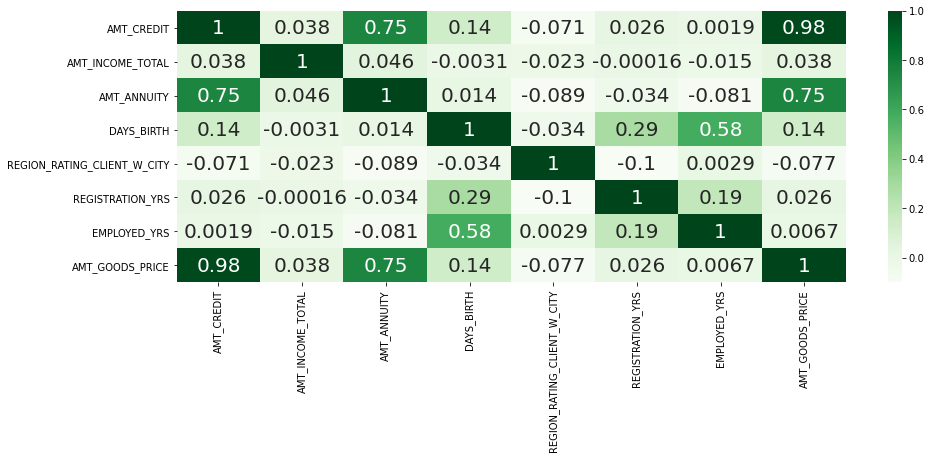

In [160]:
correlation = df1_target_1[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY',
                                  'REGISTRATION_YRS','EMPLOYED_YRS','AMT_GOODS_PRICE']].corr(method = 'pearson')
plt.figure(figsize=[15,5])
sns.heatmap(correlation, cmap='Greens', annot=True, annot_kws = {'fontsize':20})
plt.yticks(rotation=0) 
plt.show()

In [161]:
print("Non-Defaulters\n\n",merged_data[merged_data.TARGET == 0]['NAME_CONTRACT_STATUS'].value_counts()/len(merged_data)*100)


Non-Defaulters

 Approved        57.922856
Canceled        16.668376
Refused         15.275649
Unused offer     1.477823
Name: NAME_CONTRACT_STATUS, dtype: float64


In [162]:
print("Defaulters\n\n",merged_data[merged_data.TARGET == 1]['NAME_CONTRACT_STATUS'].value_counts()/len(merged_data)*100)

Defaulters

 Approved        4.756522
Refused         2.082336
Canceled        1.683524
Unused offer    0.132914
Name: NAME_CONTRACT_STATUS, dtype: float64


In [163]:
#### Observation - We can observe that most of the defaulting customers have a approved(4.75%), previously refused (2.08%) or canceled (1.68%) applications.